In [369]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
%matplotlib inline
import math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
import imblearn as il
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

Loading the risk factor cervical csv to dataframe

Note: Change path based on where cervical_cancer is saved in local computer

In [322]:
cervical_df=pd.read_csv("/home/centisha/data/Cervical_Cancer/risk_factors_cervical_cancer.csv")

Displaying mean ,max and other stat funtion for preliminary analysis.

In [323]:
cervical_df.describe(include='all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858,858,858,858,858,858,858,858,858,...,858,858,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
unique,NaN,13,22,12,3,31,63,3,41,3,...,19,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2.0,15.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,272,163,270,722,722,722,481,269,658,...,787,787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,26.820513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Check if dataset is a balanced set.That means if count of 1's and 0's are close.

In [324]:
cervical_df.groupby('Hinselmann').count()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Schiller,Citology,Biopsy
Hinselmann,,,,,,,,,,,,,,,,,,,,,
0,823,823,823,823,823,823,823,823,823,823,...,823,823,823,823,823,823,823,823,823,823
1,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35


Checking columns/row with ? as value and then replacing it with null value.

In [325]:
cervical_df.isin(['?']).sum(axis=0)

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [326]:
cervical_df.replace('?', np.nan,inplace=True)

In [327]:
cervical_df.isin(['?']).sum(axis=0)

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


Replacing Null by zeros and one based on Forward fill and backward fill.

In [328]:
cleanColumns = ["STDs","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis",
            "STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease",
            "STDs:genital herpes",
            "STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","Smokes",
            "Hormonal Contraceptives","IUD"]

for column in cleanColumns:
    cervical_df[column] = cervical_df[column].ffill()
    cervical_df[column] = cervical_df[column].bfill()

cervical_df.isin([np.NaN]).sum(axis=0)

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                  0
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)       108
IUD                                     0
IUD (years)                           117
STDs                                    0
STDs (number)                         105
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                  

Replacing null values with mean for all the columns with data type as number/float.

In [329]:
float_column=["Smokes (years)","Smokes (packs/year)","Number of sexual partners",
             "First sexual intercourse","Num of pregnancies","Hormonal Contraceptives (years)",
             "IUD (years)","STDs (number)"]
for column in float_column:
    cervical_df[column] = cervical_df[column].astype('float64')

In [330]:
for column in float_column:
    mean=cervical_df[column].mean()
    cervical_df[column]=cervical_df[column].fillna(mean)

In [331]:
cervical_df.isin([np.NaN]).sum(axis=0)

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                  

In [332]:
cervical_df.describe(include='all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858,858.000000,858.000000,858,858.000000,858,...,71,71,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,2,NaN,2,...,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,732,NaN,NaN,545,NaN,764,...,15,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,26.820513,2.527644,16.995300,2.275561,NaN,1.219721,0.453144,NaN,2.256419,NaN,...,NaN,NaN,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,NaN,4.057885,2.209657,NaN,3.519082,NaN,...,NaN,NaN,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,NaN,0.000000,0.000000,NaN,2.256419,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Column 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis' has large number of null. 
Replacing it with mean may not give us correct value of the column

In [333]:
cervical_df['STDs: Time since first diagnosis'].value_counts()

1.0     15
3.0     10
2.0      9
4.0      6
7.0      5
5.0      4
16.0     4
6.0      3
8.0      3
21.0     2
11.0     2
19.0     2
22.0     1
9.0      1
15.0     1
12.0     1
10.0     1
18.0     1
Name: STDs: Time since first diagnosis, dtype: int64

In [334]:
cervical_df['STDs: Time since last diagnosis'].value_counts()

1.0     17
2.0     10
3.0      9
4.0      6
7.0      5
16.0     4
5.0      3
6.0      3
8.0      3
21.0     2
11.0     2
22.0     1
9.0      1
15.0     1
12.0     1
10.0     1
19.0     1
18.0     1
Name: STDs: Time since last diagnosis, dtype: int64

In [335]:
cervical_df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'],inplace=True)

Droping other three target columns since we are not going to use them for analysis in this project.

In [336]:
cervical_df.drop(columns=['Schiller','Citology','Biopsy'],inplace=True)

Creating scattered matrix to map correlation between columns

Note: Change path based on where cervical_cancer is saved in local computer

In [337]:
cervical_df.to_csv("/home/centisha/data/Cervical_Cancer/risk_factors_cervical_cancer_transformed.csv")

Note: Change path based on where cervical_cancer is saved in local computer

In [338]:
cervical_df=spark.read.csv("/home/centisha/data/Cervical_Cancer/risk_factors_cervical_cancer_transformed.csv",header=True,inferSchema='true')

In [339]:

cervical_df.groupby('Hinselmann').count().show()


+----------+-----+
|Hinselmann|count|
+----------+-----+
|         1|   35|
|         0|  823|
+----------+-----+



Find correlation between feature and target column.

In [340]:
independent_column=["Number of sexual partners","First sexual intercourse", "Num of pregnancies", "Smokes",
                    "Smokes (years)","Smokes (packs/year)","Hormonal Contraceptives", "Hormonal Contraceptives (years)"
                    ,"IUD","IUD (years)","STDs","STDs (number)", "STDs:condylomatosis" , "STDs:cervical condylomatosis"
                    ,"STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis",
                    "STDs:pelvic inflammatory disease","STDs:genital herpes", "STDs:molluscum contagiosum",
                    "STDs:AIDS","STDs:HIV" ,"STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis",
                    "Dx:Cancer","Dx:CIN","Dx:HPV","Dx","Age"]
for column in independent_column:
    print( "Correlation to Hinselmann for ", column, cervical_df.stat.corr('Hinselmann', column))

('Correlation to Hinselmann for ', 'Number of sexual partners', -0.039272542601414336)
('Correlation to Hinselmann for ', 'First sexual intercourse', -0.0165458131338407)
('Correlation to Hinselmann for ', 'Num of pregnancies', 0.0386847743476278)
('Correlation to Hinselmann for ', 'Smokes', 0.04761017803825785)
('Correlation to Hinselmann for ', 'Smokes (years)', 0.07123227048340815)
('Correlation to Hinselmann for ', 'Smokes (packs/year)', 0.026662130160738755)
('Correlation to Hinselmann for ', 'Hormonal Contraceptives', 0.03388123670972414)
('Correlation to Hinselmann for ', 'Hormonal Contraceptives (years)', 0.0388253891651817)
('Correlation to Hinselmann for ', 'IUD', 0.04085085623512077)
('Correlation to Hinselmann for ', 'IUD (years)', 0.007858049491657559)
('Correlation to Hinselmann for ', 'STDs', 0.044777483174909045)
('Correlation to Hinselmann for ', 'STDs (number)', 0.06515507992767904)
('Correlation to Hinselmann for ', 'STDs:condylomatosis', 0.04783412168328441)
('Corre

Create vector defining feature and target column.

In [341]:
from pyspark.ml.feature import VectorAssembler
stages = []
vectorAssembler = VectorAssembler(inputCols=independent_column, outputCol= 'features')
vCervical_df= vectorAssembler.transform(cervical_df)

vCervical_df=vCervical_df.select(['features','Hinselmann',"Number of sexual partners","First sexual intercourse",
                                  "Num of pregnancies", "Smokes","Smokes (years)","Smokes (packs/year)",
                                  "Hormonal Contraceptives", "Hormonal Contraceptives (years)","IUD","IUD (years)",
                                  "STDs","STDs (number)", "STDs:condylomatosis" , "STDs:cervical condylomatosis",
                                  "STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis",
                                  "STDs:pelvic inflammatory disease","STDs:genital herpes", "STDs:molluscum contagiosum",
                                  "STDs:AIDS","STDs:HIV" ,"STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis",
                                  "Dx:Cancer","Dx:CIN","Dx:HPV","Dx","Age"])
vCervical_df.show(3)

+--------------------+----------+-------------------------+------------------------+------------------+------+--------------+-------------------+-----------------------+-------------------------------+---+-----------+----+-------------+-------------------+----------------------------+---------------------------+----------------------------------+-------------+--------------------------------+-------------------+--------------------------+---------+--------+----------------+--------+-------------------------+---------+------+------+---+---+
|            features|Hinselmann|Number of sexual partners|First sexual intercourse|Num of pregnancies|Smokes|Smokes (years)|Smokes (packs/year)|Hormonal Contraceptives|Hormonal Contraceptives (years)|IUD|IUD (years)|STDs|STDs (number)|STDs:condylomatosis|STDs:cervical condylomatosis|STDs:vaginal condylomatosis|STDs:vulvo-perineal condylomatosis|STDs:syphilis|STDs:pelvic inflammatory disease|STDs:genital herpes|STDs:molluscum contagiosum|STDs:AIDS|ST

Creating training and test dataset for ML algorithim

In [342]:
train_Hinselmann, test_Hinselmann =vCervical_df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " +str(train_Hinselmann.count()))
print("Test Dataset Count: " + str(test_Hinselmann.count()))

Training Dataset Count: 605
Test Dataset Count: 253


Apply logistic Regression on the data set and print coefficient to see mostr important features

In [343]:
from pyspark.ml.classification import LogisticRegression
lr_Hinselmann = LogisticRegression(featuresCol = 'features', labelCol = 'Hinselmann', maxIter=10)
lrModel_Hinselmann = lr_Hinselmann.fit(train_Hinselmann)

In [344]:
print("Coefficients: " + str(lrModel_Hinselmann.coefficients))

Coefficients: [-0.2589463752686743,0.028341749542656888,0.14499151710134317,-0.021149305960679612,0.14748607320251575,-0.1410328830619211,0.43555288323674834,0.036390361692831746,0.43135294466469626,-0.08098716299841119,0.13195554134700394,0.039280457252840704,0.3575744408590773,0.0,-2.372670286432076,0.3575744408590773,-2.3096006993163796,0.0,-1.6753394392809486,-1.5043415261441477,0.0,1.9023180098202326,-2.9825969368957423,-7.4280081768292305,-1.5034138485012494,1.2504831160560497,-2.576306967687321,1.7333391795598165,0.40825832046753047,-0.04322373780053746]


calculation are under the curve for Logistic Regression.

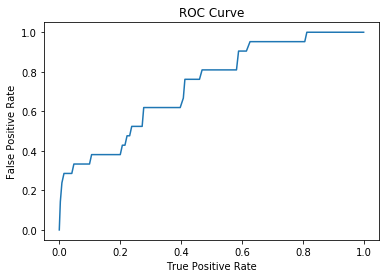

Training set areaUnderROC: 0.72985975212


In [345]:
trainingSummary_Hinselmann = lrModel_Hinselmann.summary

roc = trainingSummary_Hinselmann.roc.toPandas()

plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary_Hinselmann.areaUnderROC))

Ploting confusion matrix for LR model

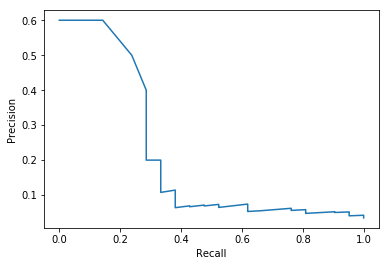

In [202]:
pr_Hinselmann= trainingSummary_Hinselmann.pr.toPandas()
plt.plot(pr_Hinselmann['recall'],pr_Hinselmann['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


Running the LR on test dataset now to validate the model.

In [346]:
predictions_Hinselmann = lrModel_Hinselmann.transform(test_Hinselmann)

predictions_Hinselmann.select("Hinselmann","rawPrediction","prediction","probability").show(10)

+----------+--------------------+----------+--------------------+
|Hinselmann|       rawPrediction|prediction|         probability|
+----------+--------------------+----------+--------------------+
|         0|[3.97837618736850...|       0.0|[0.98162784735535...|
|         0|[3.70134187928803...|       0.0|[0.97590455284013...|
|         0|[3.12046767640080...|       0.0|[0.95772916562807...|
|         0|[5.27748289102235...|       0.0|[0.99492066620385...|
|         0|[5.64191735361694...|       0.0|[0.99646646730138...|
|         0|[2.33648729710134...|       0.0|[0.91185415578342...|
|         0|[3.18065084995136...|       0.0|[0.96009960650396...|
|         0|[3.31308380727771...|       0.0|[0.96487494494912...|
|         0|[2.67323010978345...|       0.0|[0.93542841143112...|
|         0|[2.92845058802931...|       0.0|[0.94923506417394...|
+----------+--------------------+----------+--------------------+
only showing top 10 rows



Apply binary classification on the Cervical DataTest

In [347]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator_Hinselmann= BinaryClassificationEvaluator(labelCol='Hinselmann')
print('Test Area Under ROC', evaluator_Hinselmann.evaluate(predictions_Hinselmann))

('Test Area Under ROC', 0.5890615660490139)


applying decision tree model on data and calculating Area under the curve.

In [349]:
from pyspark.ml.classification import DecisionTreeClassifier
dt_Hinselmann = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Hinselmann', maxDepth = 3)
dtModel_Hinselmann = dt_Hinselmann.fit(train_Hinselmann)
predictions_Hinselmann = dtModel_Hinselmann.transform(test_Hinselmann)
predictions_Hinselmann.select("Hinselmann","rawPrediction","prediction","probability").show(10)

+----------+-------------+----------+--------------------+
|Hinselmann|rawPrediction|prediction|         probability|
+----------+-------------+----------+--------------------+
|         0| [572.0,15.0]|       0.0|[0.97444633730834...|
|         0| [572.0,15.0]|       0.0|[0.97444633730834...|
|         0| [572.0,15.0]|       0.0|[0.97444633730834...|
|         0| [572.0,15.0]|       0.0|[0.97444633730834...|
|         0| [572.0,15.0]|       0.0|[0.97444633730834...|
|         0|    [0.0,2.0]|       1.0|           [0.0,1.0]|
|         0| [572.0,15.0]|       0.0|[0.97444633730834...|
|         0| [572.0,15.0]|       0.0|[0.97444633730834...|
|         0| [572.0,15.0]|       0.0|[0.97444633730834...|
|         0| [572.0,15.0]|       0.0|[0.97444633730834...|
+----------+-------------+----------+--------------------+
only showing top 10 rows



In [350]:
print("Test Area Under ROC: " + str(evaluator_Hinselmann.evaluate(predictions_Hinselmann,{evaluator_Hinselmann.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.510460251046


Applying random forest algorithim.

In [351]:
from pyspark.ml.classification import RandomForestClassifier

rf_Hinselmann = RandomForestClassifier(featuresCol = 'features', labelCol = 'Hinselmann')
rfModel_Hinselmann = rf_Hinselmann.fit(train_Hinselmann)
predictions_Hinselmann = rfModel_Hinselmann.transform(test_Hinselmann)
predictions_Hinselmann.select('Hinselmann', 'rawPrediction', 'prediction', 'probability').show(10)

+----------+--------------------+----------+--------------------+
|Hinselmann|       rawPrediction|prediction|         probability|
+----------+--------------------+----------+--------------------+
|         0|[19.6710870263384...|       0.0|[0.98355435131692...|
|         0|[19.7379901993805...|       0.0|[0.98689950996902...|
|         0|[19.9425858237247...|       0.0|[0.99712929118623...|
|         0|[19.5760776439089...|       0.0|[0.97880388219544...|
|         0|[19.2778790040519...|       0.0|[0.96389395020259...|
|         0|[15.6299842753287...|       0.0|[0.78149921376643...|
|         0|[19.4452187676176...|       0.0|[0.97226093838088...|
|         0|[19.6138598394815...|       0.0|[0.98069299197407...|
|         0|[19.0452187676176...|       0.0|[0.95226093838088...|
|         0|[19.5815773370377...|       0.0|[0.97907886685188...|
+----------+--------------------+----------+--------------------+
only showing top 10 rows



In [352]:
print("Test Area Under ROC: " + str(evaluator_Hinselmann.evaluate(predictions_Hinselmann, {evaluator_Hinselmann.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.49387328153


Since none of the above model are performing well , we will try Gradient boost Classifier..

In [356]:
from pyspark.ml.classification import GBTClassifier

gbt_Hinselmann = GBTClassifier(maxIter=10).setLabelCol("Hinselmann").setFeaturesCol("features")
gbtModel_Hinselmann = gbt_Hinselmann.fit(train_Hinselmann)
predictions_Hinselmann = gbtModel_Hinselmann.transform(test_Hinselmann)
predictions_Hinselmann.select('Hinselmann','rawPrediction', 'prediction', 'probability').show(10)

+----------+--------------------+----------+--------------------+
|Hinselmann|       rawPrediction|prediction|         probability|
+----------+--------------------+----------+--------------------+
|         0|[1.19793543986723...|       0.0|[0.91651189503327...|
|         0|[0.56959904578380...|       0.0|[0.75753237722869...|
|         0|[1.31725307871478...|       0.0|[0.93304959018495...|
|         0|[1.29062878874648...|       0.0|[0.92964556502599...|
|         0|[1.26772871926133...|       0.0|[0.92659043695630...|
|         0|[-2.3771607763543...|       1.0|[0.00854081324715...|
|         0|[1.29427843432990...|       0.0|[0.93012147826230...|
|         0|[1.30662883279308...|       0.0|[0.93170996189357...|
|         0|[1.29427843432990...|       0.0|[0.93012147826230...|
|         0|[1.32156282591188...|       0.0|[0.93358602754868...|
+----------+--------------------+----------+--------------------+
only showing top 10 rows



In [357]:

print("Test Area Under ROC: " + str(evaluator_Hinselmann.evaluate(predictions_Hinselmann, {evaluator_Hinselmann.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.593245666467


Since none of the algorithm is performing well , its time to tranform unblanced data to balaned dataset using SMOTE.
Create a dataframne for all the feature and label_df for predictor.

In [358]:
features_df=cervical_df.select(["Number of sexual partners","First sexual intercourse", "Num of pregnancies", 
                                "Smokes","Smokes (years)","Smokes (packs/year)","Hormonal Contraceptives", 
                                "Hormonal Contraceptives (years)","IUD","IUD (years)","STDs","STDs (number)",
                                "STDs:condylomatosis" , "STDs:cervical condylomatosis","STDs:vaginal condylomatosis",
                                "STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease",
                                "STDs:genital herpes", "STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV" ,
                                "STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx:Cancer","Dx:CIN",
                                "Dx:HPV","Dx","Age"]).collect()
label_df=cervical_df.select("Hinselmann").collect()
print features_df[0]
#features_df.show(1)


Row(Number of sexual partners=4.0, First sexual intercourse=15.0, Num of pregnancies=1.0, Smokes=0.0, Smokes (years)=0.0, Smokes (packs/year)=0.0, Hormonal Contraceptives=0.0, Hormonal Contraceptives (years)=0.0, IUD=0.0, IUD (years)=0.0, STDs=0.0, STDs (number)=0.0, STDs:condylomatosis=0.0, STDs:cervical condylomatosis=0.0, STDs:vaginal condylomatosis=0.0, STDs:vulvo-perineal condylomatosis=0.0, STDs:syphilis=0.0, STDs:pelvic inflammatory disease=0.0, STDs:genital herpes=0.0, STDs:molluscum contagiosum=0.0, STDs:AIDS=0.0, STDs:HIV=0.0, STDs:Hepatitis B=0.0, STDs:HPV=0.0, STDs: Number of diagnosis=0, Dx:Cancer=0, Dx:CIN=0, Dx:HPV=0, Dx=0, Age=18)


In [359]:
#let's split the predictor and dependent variables in training and test datasets:

features_df_train, features_df_test, label_df_train, label_df_test = train_test_split(features_df, label_df, 
                                                                                      test_size=0.1, random_state=0)

Splitting training dataset further to train and validation data.

In [360]:
features_train, features_val, label_train, label_val = train_test_split(features_df_train, 
                                                                        label_df_train,test_size = 0.1,random_state=0)

apply Smote funtion on data to resample the data.

In [361]:
sm = SMOTE(random_state=12, ratio = 'auto', kind = 'regular')

In [362]:
features_train_res, label_train_res = sm.fit_sample(features_train, label_train)


/usr/lib64/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


After resampling using SMOTE now the Dataset is blanced and ready to use

In [368]:
print('Resampled dataset shape {}'.format(Counter(label_train_res)))

Resampled dataset shape Counter({0: 664, 1: 664})


Applying logistic regression and calculate accuracy.

In [370]:
sm_lr = LogisticRegression(random_state=0)

sm_lr.fit(features_train_res, label_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [371]:
print('Accuracy: ', sm_lr.score(features_val, label_val))
print('Recall Score: ', recall_score(label_val, sm_lr.predict(features_val)))

('Accuracy: ', 0.6666666666666666)
('Recall Score: ', 0.3333333333333333)


Since LR did not perform well , we can try RandomForrest to see if we can improve performace of the data set

In [372]:
#random forrest

sm_rf = RandomForestClassifier(random_state=12)

sm_rf.fit(features_train_res, label_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [373]:
#validation results

print('Accuracy: ', sm_rf.score(features_val, label_val))
print('Recall Score: ', recall_score(label_val, sm_rf.predict(features_val)))

('Accuracy: ', 0.9487179487179487)
('Recall Score: ', 0.0)


In [374]:
#Test results
print('Accuracy: ', sm_rf.score(features_df_test, label_df_test))
print('Recall Score: ', recall_score(label_df_test, sm_rf.predict(features_df_test)))


('Accuracy: ', 0.9651162790697675)
('Recall Score: ', 0.0)


Determining most important feature in the dataset

In [375]:
features_df=spark.createDataFrame(features_train)
import pandas as pd
feature_importances = pd.DataFrame(sm_rf.feature_importances_,
                                   index=features_df.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.reset_index(inplace=True)
print(feature_importances)

                                 index  importance
0                   Num of pregnancies    0.198162
1            Number of sexual partners    0.144027
2      Hormonal Contraceptives (years)    0.092247
3             First sexual intercourse    0.089323
4                                  Age    0.088357
5              Hormonal Contraceptives    0.073577
6                                  IUD    0.048962
7                               Dx:HPV    0.042715
8                          IUD (years)    0.034733
9                        STDs (number)    0.030689
10                           Dx:Cancer    0.026437
11                      Smokes (years)    0.022609
12                            STDs:HIV    0.021215
13                                STDs    0.018884
14                              Smokes    0.018434
15                 Smokes (packs/year)    0.016706
16           STDs: Number of diagnosis    0.011253
17                 STDs:condylomatosis    0.007073
18                       STDs:s

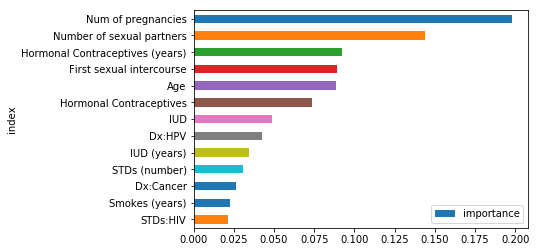

In [376]:
feature_importances=feature_importances.query('importance>0.02')

ax=feature_importances.plot.barh(x='index', y='importance')
ax.invert_yaxis() 
